In [ ]:
%%capture
!pip install khayyam

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from khayyam import *
from datetime import date, datetime
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
IndexData = pd.read_html('IndexData.xls')[0]

# Vared Kardane Shakhes

Paksazi dadehaye shakhes:

In [ ]:
IndexData.drop_duplicates(inplace=True)
IndexData = IndexData.sort_values(by='dateissue')
IndexData['dateissue'] = IndexData['dateissue'].astype('str')

Joda kardane sal va mah:

In [ ]:
IndexData['Year/Month'] = IndexData['dateissue'].apply(lambda x: x[:4]+'/'+x[4:6])

Mohasebe return mahane:

In [ ]:
IndexData = IndexData.groupby('Year/Month').mean()
IndexData = IndexData.pct_change()
IndexData = IndexData.rename(columns={'Value': 'Index Montly Return'})

In [ ]:
IndexData

,Index Montly Return
Year/Month,
1387/09,NaN
1387/10,-0.044542
1387/11,-0.019174
1387/12,-0.036608
1388/01,-0.004603
...,...
1399/10,-0.077804
1399/11,-0.085907
1399/12,-0.007474


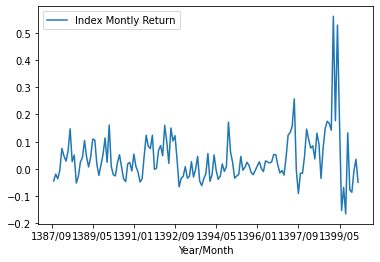

In [ ]:
IndexData.plot()

# Vared kardane risk free (akhza)

In [ ]:
indexes = ['1387/05', '1387/06', '1387/07', '1387/08', '1387/09', '1387/10', '1387/11', '1387/12', '1388/01', '1388/02', '1388/03', '1388/04', '1388/05', '1388/06', '1388/07', '1388/08', '1388/09', '1388/10', '1388/11', '1388/12', '1389/01', '1389/02', '1389/03', '1389/04', '1389/05', '1389/06', '1389/07', '1389/08', '1389/09', '1389/10', '1389/11', '1389/12', '1390/01', '1390/02', '1390/03', '1390/04', '1390/05', '1390/06', '1390/07', '1390/08', '1390/09', '1390/10', '1390/11', '1390/12', '1391/01', '1391/02', '1391/03', '1391/04', '1391/05', '1391/06', '1391/07', '1391/08', '1391/09', '1391/10', '1391/11', '1391/12', '1392/01', '1392/02', '1392/03', '1392/04', '1392/05', '1392/06', '1392/07', '1392/08', '1392/09', '1392/10', '1392/11', '1392/12', '1393/01', '1393/02', '1393/03', '1393/04', '1393/05', '1393/06', '1393/07', '1393/08', '1393/09', '1393/10', '1393/11', '1393/12', '1394/01', '1394/02', '1394/03', '1394/04', '1394/05', '1394/06', '1394/07', '1394/08', '1394/09', '1394/10', '1394/11', '1394/12', '1395/01', '1395/02', '1395/03', '1395/04', '1395/05', '1395/06', '1395/07', '1395/08', '1395/09', '1395/10', '1395/11', '1395/12', '1396/01', '1396/02', '1396/03', '1396/04', '1396/05', '1396/06', '1396/07', '1396/08', '1396/09', '1396/10', '1396/11', '1396/12', '1397/01', '1397/02', '1397/03', '1397/04', '1397/05', '1397/06', '1397/07', '1397/08', '1397/09', '1397/10', '1397/11', '1397/12', '1398/01', '1398/02', '1398/03', '1398/04', '1398/05', '1398/06', '1398/07', '1398/08', '1398/09', '1398/10', '1398/11', '1398/12', '1399/01', '1399/02', '1399/03', '1399/04', '1399/05', '1399/06', '1399/07', '1399/08', '1399/09', '1399/10', '1399/11', '1399/12', '1400/01', '1400/02']

In [ ]:
akhza = pd.DataFrame({'Year/Month': indexes,
                      'rf-return': np.zeros(len(indexes))}).set_index('Year/Month')

In [ ]:
akhza[akhza.index < '1396/01'] = 0.0207847
akhza[(akhza.index < '1397/01') & (akhza.index >= '1396/01')] = 0.016709
akhza[(akhza.index < '1398/01') & (akhza.index >= '1397/01')] = 0.0180876
akhza[(akhza.index < '1399/01') & (akhza.index >= '1398/01')] = 0.0153095
akhza[(akhza.index < '1399/07') & (akhza.index >= '1399/01')] = 0.0138884
akhza[(akhza.index >= '1399/07')] = 0.0160119

# Vared Kardane Sandoogh ha

Yek function minevisim ke esme file ra migirad va return fund ra be soorate mahane mohasebe mikonad:

In [ ]:
def mutualFunds(filename):
  """
  Voroodi taabe esme file marboot be fund ast.
  khorooji taabe ye DataFrame ast ke return mahane fund ra hesab karde ast.
  """
  df = pd.read_html(filename)[0] # baz kardane file
  # Clean kardane DataFrame:
  df.drop_duplicates(inplace=True)
  df['Year/Month'] = df['Date'].apply(lambda x:x[:-3]) # Joda kardane sal va mah
  del df['AghazFaliat'], df['NAVAmari'], df['NAVSodoor'],\
   df['Units'], df['NetAsset'], df['Date']      # Hazfe sotoonhaye ezafi
  name = df['name'][0] # Joda kardane esme sandoogh
  df = df.groupby('Year/Month').mean() # mianging gereftan az gheymate sahme mahane baraye sakhte returne mahane
  df = df.pct_change()
  df = df.rename(columns={'NAVEbtal': name}) # gharardadane esme sandoogh be onvane esme sotoon
  return df

In [ ]:
file_names = ['MutualFundData (1).xls', 'MutualFundData (2).xls', 
              'MutualFundData (3).xls', 'MutualFundData (4).xls',
              'MutualFundData (5).xls', 'MutualFundData (6).xls',
              'MutualFundData (7).xls', 'MutualFundData (8).xls',
              'MutualFundData (9).xls', 'MutualFundData (10).xls',
              'MutualFundData (11).xls', 'MutualFundData (12).xls',
              'MutualFundData (13).xls', 'MutualFundData (14).xls',
              'MutualFundData (15).xls', 'MutualFundData (16).xls',
              'MutualFundData (17).xls', 'MutualFundData (18).xls',
              'MutualFundData (19).xls', 'MutualFundData (20).xls',]

## Sakhtane yek DataFrame baraye gereftane returne tamame sandooghha

In [ ]:
returns = IndexData
for i in file_names:
  returns = returns.join(mutualFunds(i), how='outer')

In [ ]:
returns

,Index Montly Return,کارگزاری پارسیان,مشترک بورسیران,بانک دی,مشترک یکم سامان,مشترک آگاه,صندوق سرمایه‌گذاری گنجینه رفاه,باران کارگزاری بانک کشاورزی,صندوق سرمایه‌گذاری آسمان آرمانی سهام,توسعه صادرات,سپهر اول کارگزاری بانک صادرات,صندوق سرمایه‌گذاری فیروزه موفقیت,مشترک عقیق,صندوق سرمایه‌گذاری مشترک نوید انصار,صندوق سرمایه‌گذاری مشترک سبحان,صندوق سرمایه‌گذاری بانک توسعه تعاون,صندوق سرمایه‌گذاری مشترک صبا,قابل معامله امين تدبيرگران فردا,اندیشه خبرگان سهام,مشترک رشد سامان,صندوق سرمایه‌گذاری مشترک مبین سرمایه
Year/Month,,,,,,,,,,,,,,,,,,,,,
1387/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1387/06,NaN,NaN,NaN,NaN,NaN,0.087092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1387/07,NaN,NaN,NaN,NaN,NaN,0.013264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1387/08,NaN,NaN,NaN,NaN,NaN,-0.054980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1387/09,NaN,NaN,NaN,NaN,NaN,-0.011016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399/10,-0.077804,-0.015599,-0.063334,-0.022858,-0.123122,-0.034834,-0.067940,-0.099104,0.019199,-0.087283,-0.075857,0.051258,-0.045859,-0.025222,-0.029284,-0.062706,-0.038671,0.000776,-0.078611,-0.097858,-0.091742
1399/11,-0.085907,-0.166375,-0.087449,-0.126209,-0.095108,-0.074060,-0.089998,-0.077118,-0.035589,-0.089411,-0.084516,-0.041775,-0.085670,-0.078597,-0.085677,-0.105688,-0.104070,-0.101900,-0.078471,-0.087866,-0.089164
1399/12,-0.007474,-0.038070,0.005320,-0.044957,0.009784,0.008545,-0.006393,0.003383,-0.000480,-0.006957,-0.012828,0.003144,0.017967,0.014386,0.011353,-0.017566,-0.013352,0.000902,0.018855,-0.019657,-0.003449


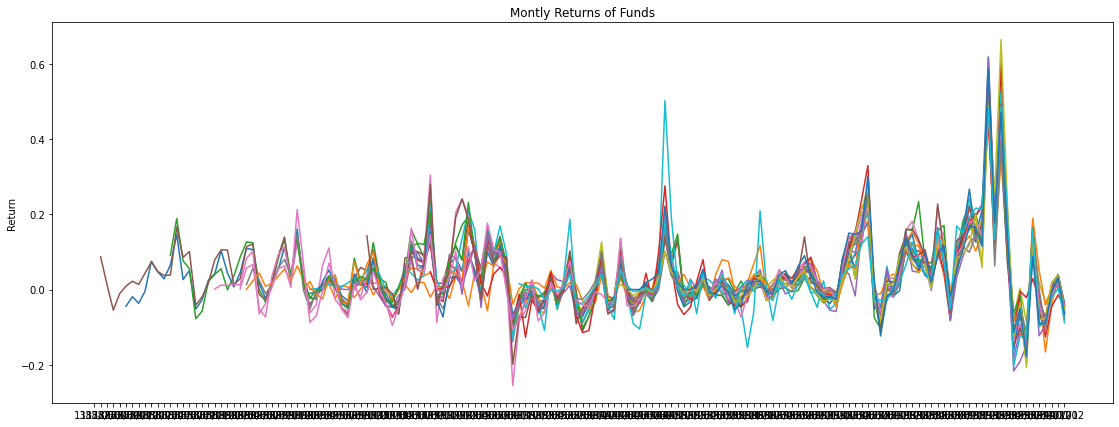

In [ ]:
plt.figure(figsize=(19,7))
plt.title('Montly Returns of Funds')
plt.ylabel('Return')
# plt.grid(True)
plt.plot(returns)

# Regression with alpha and beta

In [ ]:
alpha = [] # an emty list to append alphas
alpa_tstat = [] # an empty list to append alpa t-statistcs
alpha_pval = [] # an empty list to append alpa p-values
beta = [] # an empty list to append betas
beta_tstat = [] # an empty list to append beta t-statistcs
beta_pval = [] # an empty list to append beta p-values

In [ ]:
for i in range(1, len(returns.columns)):
  model = sm.OLS(returns.iloc[:,0]-akhza.squeeze(),
               sm.add_constant(returns.iloc[:,i]-akhza.squeeze()),
               missing='drop').fit()
  # append desired variables to its list
  alpha.append(model.params.iloc[0])
  beta.append(model.params.iloc[1])
  alpa_tstat.append(model.tvalues.iloc[0])
  beta_tstat.append(model.tvalues.iloc[1])
  alpha_pval.append(model.pvalues.iloc[0])
  beta_pval.append(model.pvalues.iloc[1])

Make a DataFrame of parametrs

In [ ]:
Results = pd.DataFrame({
    'Fund Name': returns.columns[1:], 
    'Alpha': alpha,
    'Alpha t-stat': alpa_tstat,
    'Alpha p-val': alpha_pval,
    'Beta': beta,
    'Beta t-stat': beta_tstat,
    'Beta p-val': beta_pval
}).set_index('Fund Name').sort_index()

In [ ]:
Results

,Alpha,Alpha t-stat,Alpha p-val,Beta,Beta t-stat,Beta p-val
Fund Name,,,,,,
اندیشه خبرگان سهام,0.004254,1.065282,0.290409,0.908832,28.633561,2.222969e-40
باران کارگزاری بانک کشاورزی,0.005124,2.414581,0.017167,0.983348,44.323118,1.582373e-79
بانک دی,0.006475,2.461483,0.015295,0.984687,36.194354,2.186170e-65
توسعه صادرات,0.002357,0.535442,0.593352,0.746703,19.923761,1.469306e-39
سپهر اول کارگزاری بانک صادرات,0.006569,2.680298,0.008408,0.929518,38.924443,3.582405e-69
صندوق سرمایه‌گذاری آسمان آرمانی سهام,-0.003459,-1.020724,0.310215,1.101454,31.346033,3.526501e-49
صندوق سرمایه‌گذاری بانک توسعه تعاون,0.001623,0.424082,0.672342,0.836844,24.907358,8.424943e-47
صندوق سرمایه‌گذاری فیروزه موفقیت,-0.002257,-0.622686,0.534598,1.176918,24.808348,9.749784e-51
صندوق سرمایه‌گذاری مشترک سبحان,0.007151,2.305144,0.023335,0.953183,33.224545,4.262532e-54


In [ ]:
Results[Results['Alpha p-val']<0.05]

,Alpha,Alpha t-stat,Alpha p-val,Beta,Beta t-stat,Beta p-val
Fund Name,,,,,,
باران کارگزاری بانک کشاورزی,0.005124,2.414581,0.017167,0.983348,44.323118,1.582373e-79
بانک دی,0.006475,2.461483,0.015295,0.984687,36.194354,2.186170e-65
سپهر اول کارگزاری بانک صادرات,0.006569,2.680298,0.008408,0.929518,38.924443,3.582405e-69
صندوق سرمایه‌گذاری مشترک سبحان,0.007151,2.305144,0.023335,0.953183,33.224545,4.262532e-54
صندوق سرمایه‌گذاری مشترک صبا,0.008602,3.342554,0.001078,0.974241,35.100831,4.068911e-69
مشترک آگاه,-0.005238,-2.083872,0.038903,0.977991,35.648991,3.118605e-74
مشترک یکم سامان,0.007789,2.281930,0.024301,0.991316,26.992304,4.455138e-52


Text(0.5, 1.0, 'Frequency Distribution of Mutual Fund Alphas')

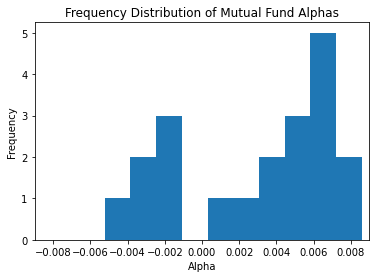

In [ ]:
plt.hist(Results['Alpha'])
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.xlim(-0.009, 0.009)
plt.title("Frequency Distribution of Mutual Fund Alphas")

Text(0.5, 1.0, 'Frequency Distribution of t-ratios of Mutual Fund Alphas')

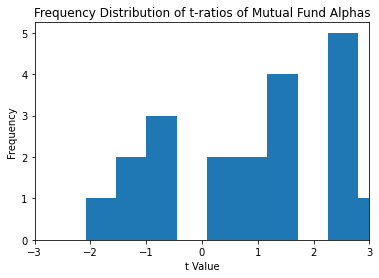

In [ ]:
plt.hist(Results['Alpha t-stat'])
plt.xlabel('t Value')
plt.ylabel('Frequency')
plt.xlim(-3, 3)
plt.title("Frequency Distribution of t-ratios of Mutual Fund Alphas")

# Q3

## Sakhtane yek DataFrame baraye gereftane returne tamame sandooghha dar bazehaye 1 va 2

baze 1: salhaye 95 va 96,
baze 2: salhaye 97 va 98

In [ ]:
baze1=returns[(returns.index>='1395/01')&(returns.index<'1397/01')] # First time frame
baze2=returns[(returns.index>='1397/01')&(returns.index<'1399/01')] # Second time frame

akhza ra dar bazehaye 1 va 2 mohasebe mikonim:

In [ ]:
akhza1=akhza[(akhza.index>='1395/01')&(akhza.index<'1397/01')].squeeze()
akhza2=akhza[(akhza.index>='1397/01')&(akhza.index<'1399/01')].squeeze()

In [ ]:
# First time frame
alpha1 = [] # an emty list to append alphas 
alpa_tstat1 = [] # an empty list to append alpa t-statistcs

# Second time frame
alpha2 = [] # an emty list to append alphas
alpa_tstat2 = [] # an empty list to append alpa t-statistcs


In [ ]:
for i in range(1, len(baze1.columns)):
  # For 1st time frame:
  model = sm.OLS(baze1.iloc[:,0]-akhza.squeeze(),
               sm.add_constant(baze1.iloc[:,i]-akhza.squeeze()),
               missing='drop').fit()
  # append desired variables to its list
  alpha1.append(model.params.iloc[0])
  # alpa_tstat1.append(model.tvalues.iloc[0])
  model = sm.OLS(baze2.iloc[:,0]-akhza.squeeze(),
               sm.add_constant(baze2.iloc[:,i]-akhza.squeeze()),
               missing='drop').fit()
  # append desired variables to its list
  alpha2.append(model.params.iloc[0])
  # alpa_tstat2.append(model.tvalues.iloc[0])

Return calculation in two time frame

In [ ]:
return1 = (((baze1.sub(akhza1, axis=0))+1).product()-1)[1:]
return2 = (((baze2.sub(akhza2, axis=0))+1).product()-1)[1:]

In [ ]:
win_lose = pd.DataFrame({
    'Fund Name': returns.columns[1:], 
    'Alpha(1st)': alpha1,
    'Alpha(2nd)': alpha2,
    'Return(1st)': return1,
    'Return(2nd)': return2
}).set_index('Fund Name').sort_index()

In [ ]:
win_lose

,Alpha(1st),Alpha(2nd),Return(1st),Return(2nd)
Fund Name,,,,
اندیشه خبرگان سهام,0.003927,0.008488,-0.338417,2.351185
باران کارگزاری بانک کشاورزی,-0.002413,0.000197,-0.185803,2.371731
بانک دی,-0.007302,0.015108,-0.116029,1.471715
توسعه صادرات,-0.006401,0.012301,-0.422396,2.073266
سپهر اول کارگزاری بانک صادرات,0.002102,0.015596,-0.272397,2.015206
صندوق سرمایه‌گذاری آسمان آرمانی سهام,-0.004897,0.007709,-0.150942,2.012912
صندوق سرمایه‌گذاری بانک توسعه تعاون,-0.005382,-0.000961,-0.179870,3.960832
صندوق سرمایه‌گذاری فیروزه موفقیت,-0.010780,-0.000055,0.037336,2.024392
صندوق سرمایه‌گذاری مشترک سبحان,-0.007685,0.011398,-0.072535,1.936450


In [ ]:
# baraye adadhaye balaye miane 1 gharar midahim
median = win_lose.median()
win_lose = pd.DataFrame(np.where(win_lose > median, 1, 0), index=win_lose.index, columns=win_lose.columns)

In [ ]:
win_lose

,Alpha(1st),Alpha(2nd),Return(1st),Return(2nd)
Fund Name,,,,
اندیشه خبرگان سهام,1,1,0,0
باران کارگزاری بانک کشاورزی,1,0,1,1
بانک دی,0,1,1,0
توسعه صادرات,0,1,0,0
سپهر اول کارگزاری بانک صادرات,1,1,0,0
صندوق سرمایه‌گذاری آسمان آرمانی سهام,0,1,1,0
صندوق سرمایه‌گذاری بانک توسعه تعاون,0,0,1,1
صندوق سرمایه‌گذاری فیروزه موفقیت,0,0,1,0
صندوق سرمایه‌گذاری مشترک سبحان,0,1,1,0


In [ ]:
win_lose.groupby('Return(1st)')['Return(2nd)'].value_counts()

Return(1st)  Return(2nd)
0            0              6
             1              4
1            1              6
             0              4
Name: Return(2nd), dtype: int64

In [ ]:
win_lose.groupby('Alpha(1st)')['Alpha(2nd)'].value_counts()

Alpha(1st)  Alpha(2nd)
0           0             6
            1             4
1           1             6
            0             4
Name: Alpha(2nd), dtype: int64